In [1]:
# !pip install opencv-python

In [2]:
import urllib.request as ur
import cv2
import numpy as np

In [3]:
# import cv2  
# mypath = "C:\\Users\\vish\\Downloads\\landscape-4354117_960_720.JPEG"  
# img = cv2.imread(mypath, 1)  
# cv2.imshow('image',img)  
# cv2.waitKey(3) # This is necessary to be required so that the image doesn't close immediately.   
# cv2.destroyAllWindows()  

In [4]:
#read an image
url = "http://s0.geograph.org.uk/photos/40/57/405725_b17937da.jpg"
url_response = ur.urlopen(url)
img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
#read a rgb/binary img 
img = cv2.imdecode(img_array, -1) 
#read a grey img
grey_img=cv2.imdecode(img_array, 0)
cv2.imshow('URL Image', img)
cv2.imshow('URL Image', grey_img)
cv2.waitKey()

-1

In [ ]:
# #write an image to a file
# mypath = "C:\\Users\\vish\\Downloads\\landscape-4354117_960_720.JPEG"  
# img = cv2.imread(mypath, 1)
# mypath = "C:\\Users\\vish\\Downloads\\landscape-4354117_960_720.JPEG.JPEG"  
# status = cv2.imwrite(mypath, 0, img) 
# print("Image written to file-system : ", status)  

In [7]:
#access pixel value
#We can retrieve a pixel value by its row and column coordinates. 
#It returns an array of blue, green, red values of the BGR image. 
#It returns the corresponding intensity for the grayscale image.
pixel = img[100,100]  
print(pixel) 

[52 54 48]


In [9]:
#height, width, number of channels and size of image  
height = img.shape[0]  
width = img.shape[1]  
channels = img.shape[2]  
size1 = img.size  
  
print('Image Height       : ',height)  
print('Image Width        : ',width)  
print('Number of Channels : ',channels)  
print('Image Size  :', size1) 

Image Height       :  480
Image Width        :  640
Number of Channels :  3
Image Size  : 921600


In [10]:
#splitting and merging image channels
b,g,r = cv2.split(img)  
img = cv2.merge((b,g,r)) 

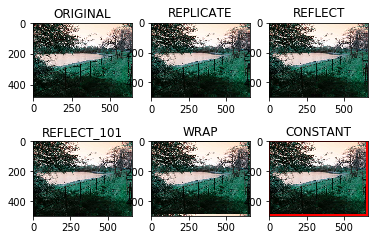

In [16]:
#making border for images
# src - It denotes input image.
# top, bottom, left, right - It defines the border width in the number of pixels in the corresponding direction.
# borderType - It defines what kind of border to be added. The border can be the following types.
# value - Color of border if border type is cv.BORDER_CONSTANT

from matplotlib import pyplot as plt
BLUE = [255,0,0]
replicate = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REPLICATE)  
reflect = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REFLECT)  
reflect101 = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REFLECT_101)  
wrap = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_WRAP)  
constant= cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)  
plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL')  
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')  
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')  
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')  
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')  
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')  
plt.show()   

In [4]:
#change image color
# src - It is used to input an image: 8-bit unsigned.
# dst - It is used to display an image as output. The output image will be same size and depth as input image.
# code - color space conversion code.

# Window name in which image is displayed   
window_name = 'Image'
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )   
cv2.imshow(window_name, image)  

In [3]:
#resize image
scale = 60  
width = int(img.shape[1] * scale / 100)  
height = int(img.shape[0] * scale / 100)  
dim = (width, height)  
# resize image  
resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)  
print('Resized Dimensions : ', resized.shape)  
cv2.imshow("Resized image", resized)  
cv2.waitKey(0)  
cv2.destroyAllWindows()  

Resized Dimensions :  (288, 384, 3)


In [4]:
#rotate image
# The image can be rotated in various angles (90,180,270 and 360). 
# OpenCV calculates the affine matrix that performs affine transformation
# which means it does not preserve the angle between the lines or distances between the points
# although it preserves the ratio of distances between points lying on the lines.

# center: It represents the center of the image.
# angle: It represents the angle by which a particular image to be rotated in the anti-clockwise direction.
# rotated: ndarray that holds the rotated image data.
# scale: The value 1.0 is denoted that the shape is preserved. Scale the image according to the provided value

# get image height, width  
(h, w) = img.shape[:2]  
# calculate the center of the image  
center = (w / 2, h / 2)  
  
angle90 = 90  
angle180 = 180  
angle270 = 270  
  
scale = 1.0  
  
# Perform the counterclockwise rotation holding at the center  
# 90 degrees  
M = cv2.getRotationMatrix2D(center, angle90, scale)  
rotated90 = cv2.warpAffine(img, M, (h, w))  
  
# 180 degrees  
M = cv2.getRotationMatrix2D(center, angle180, scale)  
rotated180 = cv2.warpAffine(img, M, (w, h))  
  
# 270 degrees  
M = cv2.getRotationMatrix2D(center, angle270, scale)  
rotated270 = cv2.warpAffine(img, M, (h, w))  
  
cv2.imshow('Original Image', img)  
cv2.waitKey(0)  # waits until a key is pressed  
cv2.destroyAllWindows()  # destroys the window showing image  
  
cv2.imshow('Image rotated by 90 degrees', rotated90)  
cv2.waitKey(0)  # waits until a key is pressed  
cv2.destroyAllWindows()  # destroys the window showing imag  
  
cv2.imshow('Image rotated by 180 degrees', rotated180)  
cv2.waitKey(0)  # waits until a key is pressed  
cv2.destroyAllWindows()  # destroys the window showing image  
  
cv2.imshow('Image rotated by 270 degrees', rotated270)  
cv2.waitKey(0)  # waits until a key is pressed  
cv2.destroyAllWindows()  # destroys the window showing image 

In [6]:
#drawing circle
# img- It represents the given image.
# center- Center of the circle
# radius- Radius of the circle
# color- Circle color
# thickness- It denotes the thickness of the circle outline, if it is positive. And negative thickness means that a filled circle is to be drawn.
# lineType- Defines the type of the circle boundary.
# shift- It represents the number of fractional bits in the coordinate of the center and the radius value.

cv2.circle(img,(80,80), 55, (0,255,0), -1)  
cv2.imshow('image',img)  
cv2.waitKey(0)  
cv2.destroyAllWindows()  

In [7]:
#drawing rectangle
# img- It represents an image.
# pt1- It denotes vertex of the rectangle.
# pt2- It denotes the vertex of the rectangle opposite to pt1.
# color- It denotes the rectangle color of brightness (grayscale image).
# thickness- It represents the thickness of the lines that makes up the rectangle. Negative values (CV_FILLED) mean that the function has to draw a filled rectangle.
# linetype- It represents the types of the line.
# shift- It represents the number of fractional bits in the point coordinates.

cv2.rectangle(img,(15,25),(200,150),(0,255,255),15)  
cv2.imshow('image',img)  
cv2.waitKey(0)  
cv2.destroyAllWindows()

In [9]:
#drawing eclipse
# img - It represents an image.
# box - It represents alternative ellipse representation via RotatedRect or CvBox2D. It means that the function is used to draws an ellipse in a curved rectangle.
# color - It denotes the ellipse color.
# angle- It denotes the angle of rotation.
# startAngle - It denotes the initial angle of the elliptic arc in degrees.
# endAngle - It denotes the ending angle of the elliptic arc in degrees.
# thickness - It is used to draw thickness of the ellipse arc outline if the value is positive. Otherwise, this specifies that a filled ellipse is to be drawn.
# lineType - It denotes the type of the ellipse boundary.
# shift - It represents the number of fractional bits in the coordinates of the center and values of axes.

cv2.ellipse(img, (250, 150), (80, 20), 5, 0, 360, (0,0,255), -1)  
cv2.imshow('image',img)  
cv2.waitKey(0)  
cv2.destroyAllWindows()

In [10]:
#drawing lines
# img- It represents an image.
# pt1- It denotes the first point of the line segments.
# pt2- It denotes the second point of the line segment.
# color - Represents the Line-color
# thickness- Represents the Line thickness
# lineType- There are various types of line:
# 8 (or omitted) - 8 connected lines.
# 4 - 4-connected line.
# CV__AA- antialiased line
# shift- It represents the number of fractional bits in the point coordinates.

cv2.line(img,(10,0),(150,150),(0,0,0),15)  
cv2.imshow('image',img)  
cv2.waitKey(0)  
cv2.destroyAllWindows()

In [16]:
#draw polylines
# img - It represents an image.
# pts - It denotes the array of polygon curves.
# npts - It denotes an array of polygon vertex counters.
# ncounters - It represents the number of curves.
# is_Closed - It is a flag that indicates whether the drawn polylines are closed or not.
# color - Color of polylines.
# thickness - It represents the Thickness of the polylines edges.
# lineType - Type of the line segment.
# shift- It represents the number of fractional bits in the point coordinates.
#defining points for polylines  
pts = np.array([[100,50],[200,300],[700,200],[500,100]], np.int32)  
# pts = pts.reshape((-1,1,2))  
cv2.polylines(img, [pts], True, (0,255,255), 3)  
cv2.imshow('image',img)  
cv2.waitKey(0)  
cv2.destroyAllWindows()  

In [4]:
#writing text to image
# img: It represents an image
# text: It represents a text which we want to write on the image.
# org: It denotes the Bottom-left corner of the text string in the image.
# font: CvFont structure is initialized using InitFont().
# color: Represents the Text color.
    
font = cv2.FONT_HERSHEY_SIMPLEX 
org = (50, 50) 
fontScale = 1 
color = (255, 0, 0) 
thickness = 2 
cv2.putText(img, 'OpenCV', org, font,  
                   fontScale, color, thickness, cv2.LINE_AA) 
cv2.imshow("image",img)  
cv2.waitKey(0)   

-1

In [5]:
#edge detection
# /path/to/img: file path of the image (required)
# minVal: Minimum intensity gradient (required)
# maxVal: Maximum intensity gradient (required)
# aperture: It is optional argument.
# L2gradient: Its default value is false.
# if value is true, Canny () uses a more computationally expensive equation to detect edges
# which provides more accuracy at the cost of resources.

# edges = cv2.Canny(img, 100, 200)  
# cv2.imshow("Edge Detected Image", edges)  
# cv2.imshow("Original Image", img)  
# cv2.waitKey(0)  # waits until a key is pressed  
# cv2.destroyAllWindows()  # destroys the window showing image  

In [8]:
#blur image
# src - It represents the source (input) image.
# dst - It represents the destination (output) image.
# ksize - It represents the size of the kernel.
# anchor - It denotes the anchor points.
# borderType - It represents the type of border to be used to the output.
cv2.imshow('Original Image',img)  
cv2.imshow('Blurred Image', cv2.blur(img, (3,3)))  
cv2.waitKey(0)  
cv2.destroyAllWindows()  

In [9]:
#image threshold
#The basic concept of the threshold is that more simplify the visual data for analysis
# src: Source image, it should be a grayscale image.
# thresh: It is used to classify the pixel value.
# maxVal: It represents the value to be given if the pixel threshold value
# threshold:OpenCV provides different styles of threshold that is used as fourth parameter of the function. 
# These are the following:
# cv2.THRESH_BINARY
# cv2.THRESH_BINARY_INV
# cv2.THRESH_TRUNC
# cv2.THRESH_TOZERO
# c
v2.THRESH_TOZERO_INV

retval, threshold = cv2.threshold(img, 62, 255, cv2.THRESH_BINARY)  
cv2.imshow("Original Image", img)  
cv2.imshow("Threshold",threshold)  
cv2.waitKey(0)  

-1

In [ ]:
#opencv mouse events
# Creating mouse callback function  
def draw_circle(event,x,y,flags,param):  
    if(event == cv2.EVENT_LBUTTONDBLCLK):  
            cv2.circle(img,(x,y),100,(255,255, 0),-1)  
# Creating a black image, a window and bind the function to window  
img = np.zeros((512,512,3), np.uint8)  
cv2.namedWindow('image')  
cv2.setMouseCallback('image',draw_circle)  
while(1):  
    cv2.imshow('image',img)  
    if cv2.waitKey(20) & 0xFF == 27:  
        break  
cv2.destroyAllWindows() 

In [18]:
cv2.imshow('img',grey_img)

In [6]:
# #template matching
# # Reading the main image   
# rgb_img = cv2.imread(r'C:\Users\DEVANSH SHARMA\rolando.jpg',1)  
# # It is need to be convert it to grayscale   
# gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)   
# # Reading the template image   
# template = cv2.imread(r'C:\Users\DEVANSH SHARMA\ronaldo_face.jpg',0)   
# # Store width in variable w and height in variable h of template  
# w, h = template.shape[:-1]   
# # Now we perform match operations.   
# res = cv2.matchTemplate(gray_img,template,cv2.TM_CCOEFF_NORMED)   
# # Declare a threshold   
# threshold = 0.8  
# # Store the coordinates of matched location in a numpy array   
# loc = np.where(res >= threshold)   
# # Draw the rectangle around the matched region.   
# for pt in zip(*loc[::-1]):   
#     cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)   
# # Now display the final matched template image   
# cv2.imshow('Detected',img_rgb)

In [1]:
# # Reading the main image   
# img_rgb = cv2.imread(r'C:\Users\DEVANSH SHARMA\mario.png',1)  
# # It is need to be convert it to grayscale   
# img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)   
# # Read the template   
# template = cv2.imread(r'C:\Users\DEVANSH SHARMA\coin1.png',0)   
# # Store width in variable w and height in variable h of template  
# w, h = template.shape[:-1]   
# # Now we perform match operations.   
# res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)   
# # Declare a threshold   
# threshold = 0.8  
# # Store the coordinates of matched region in a numpy array   
# loc = np.where( res >= threshold)   
# # Draw a rectangle around the matched region.   
# for pt in zip(*loc[::-1]):   
#     cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)   
# # Now display the final matched template image   
# cv2.imshow('Detected',img_rgb)  

In [6]:
#dilation
# Dilation is a technique where we expand the image. 
# It adds the number of pixels to the boundaries of objects in an image. 
# The structuring element controls it. The structuring element is a matrix of 1's and 0's.
# The size and shape of the structuring element define how many numbers of the pixel should be added or removed from the objects in an image.
# It is a matrix of 1's and 0's. The center pixel of the image is called the origin.
# It contains an image A with some kernel (B), which can have any shape or size, generally a square or circle. 
# Here the kernel B has a defined anchor point. It is the center of the kernel.
# In the next step, the kernel is overlapped over the image to calculate maximum pixel values. 
# When the computation is completed, the image is replaced with an anchor at the center. 
# The brighter areas increase in size that made increment in image size.
# src - It represents the input image.
# dst - It represents the output image.
# kernel - It represents the kernel.
kernel = np.ones((5,5), np.uint8) 
img_dilation = cv2.dilate(img, kernel, iterations=1)  
cv2.imshow('Input', img)  
cv2.imshow('Dilation', img_dilation)  
cv2.waitKey(0)

-1

In [4]:
# The difference between dilation and erosion is that the pixel value calculated minimum rather than the maximum in dilation. 
# The image is replaced under the anchor point with that calculated minimum pixel. 
# Unlikely dilation, the regions of darker shades increase. While it decreases in white shade or brighter side.
kernel = np.ones((5,5), np.uint8) 
img_erosion = cv2.erode(img, kernel, iterations=1)
cv2.imshow('Input', img)  
cv2.imshow('Erosion', img_erosion)    
cv2.waitKey(0)

-1

In [5]:
#opencv videocapture
# OpenCV provides the VideoCature() function which is used to work with the Camera.
# Read video, display video, and save video.
# Capture from the camera and display it.
# OpenCV allows a straightforward interface to capture live stream with the camera (webcam). It converts video into grayscale and display it
# import numpy as np  
# import cv2  
  
# cap = cv2.VideoCapture('filename')  
  
# while(cap.isOpened()):  
#     ret, frame = cap.read()  
# #it will open the camera in the grayscale mode  
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  
  
#     cv2.imshow('frame',gray)  
#     if cv2.waitKey(1) & 0xFF == ord('q'):  
#         break  
  
# cap.release()  
# cv2.destroyAllWindows()

In [ ]:
# cap = cv2.VideoCapture(0)  
  
# # Define the codec and create VideoWriter object  
# fourcc = cv2.VideoWriter_fourcc(*'XVID')  
# out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))  
  
# while(cap.isOpened()):  
#     ret, frame = cap.read()  
#     if ret==True:  
#         frame = cv2.flip(frame,0)  
  
#         # write the flipped frame  
#         out.write(frame)  
  
#         cv2.imshow('frame',frame)  
#         if cv2.waitKey(1) & 0xFF == ord('q'):  
#             break  
#     else:  
#         break  
  
# # Release everything if job is finished  
# cap.release()  
# out.release()  
# cv2.destroyAllWindows()  

In [6]:
#read an image
url = "http://s0.geograph.org.uk/photos/40/57/405725_b17937da.jpg"
url_response = ur.urlopen(url)
img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
#read a rgb/binary img 
img = cv2.imdecode(img_array, -1) 
#read a grey img
grey_img=cv2.imdecode(img_array, 0)
cv2.imshow('URL Image', img)
cv2.imshow('URL Image', grey_img)
cv2.waitKey()

-1

In [7]:
# pip install tesseract
# pip install tesseract-ocr

In [10]:
# #read text from image using ocr and pytesseract
# import pytesseract
# text = pytesseract.image_to_string(img)
# print(text)